In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# import xgboost
import xgboost
from xgboost import XGBRegressor
# , plot_tree, plot_importance

In [82]:
data_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')
sub_df   = pd.read_csv('sample_submission.csv')

In [83]:
data_df.columns

Index(['date', 'precipitation', 'temp_mean', 'temp_highest', 'temp_lowest',
       'PM10', 'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate',
       'wind_mean', 'wind_max', 'rental'],
      dtype='object')

In [84]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1095 non-null   object 
 1   precipitation  417 non-null    float64
 2   temp_mean      1095 non-null   float64
 3   temp_highest   1095 non-null   float64
 4   temp_lowest    1095 non-null   float64
 5   PM10           1028 non-null   float64
 6   PM2.5          1027 non-null   float64
 7   humidity       1095 non-null   float64
 8   sunshine_sum   1090 non-null   float64
 9   sunshine_rate  1095 non-null   float64
 10  wind_mean      1095 non-null   float64
 11  wind_max       1095 non-null   float64
 12  rental         1095 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 111.3+ KB


In [87]:
data_df['PM10']
data_df['']

for i in range(len(data_df)):
    print(data_df['PM10'][i]

34.0
36.0
31.0
39.0
51.0
38.0
47.0
49.0
37.0
27.0
30.0
21.0
48.0
64.0
63.0
97.0
99.0
80.0
51.0
86.0
52.0
38.0
21.0
26.0
22.0
28.0
37.0
26.0
39.0
36.0
35.0
34.0
48.0
31.0
27.0
23.0
27.0
34.0
45.0
63.0
66.0
44.0
41.0
43.0
59.0
32.0
41.0
nan
30.0
51.0
51.0
32.0
42.0
79.0
68.0
36.0
55.0
82.0
67.0
35.0
58.0
52.0
28.0
8.0
26.0
25.0
29.0
41.0
43.0
52.0
80.0
59.0
22.0
18.0
12.0
26.0
52.0
30.0
18.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
32.0
37.0
53.0
40.0
29.0
18.0
61.0
33.0
50.0
57.0
70.0
nan
66.0
33.0
9.0
7.0
30.0
39.0
48.0
56.0
47.0
70.0
52.0
41.0
24.0
37.0
34.0
13.0
30.0
15.0
19.0
35.0
51.0
27.0
18.0
58.0
66.0
32.0
13.0
nan
nan
9.0
8.0
nan
nan
nan
nan
nan
56.0
41.0
nan
nan
nan
35.0
43.0
nan
36.0
32.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
38.0
nan
nan
nan
51.0
nan
nan
nan
50.0
11.0
10.0
11.0
nan
nan
6.0
7.0
11.0
9.0
19.0
34.0
28.0
22.0
20.0
23.0
24.0
28.0
33.0
29.0
36.0
35.0
29.0
31.0
40.0
32.0
40.0
43.0
31.0
18.0
9.0
15.0
29.0


# 데이터 전처리

## date -> year, date -> day 로 분리

In [70]:
df = pd.DataFrame({'Joined date': pd.to_datetime(data_df.date)})
df['Joined date']= pd.to_datetime(df['Joined date']) 


data_df['Year'] = df['Joined date'].dt.year 
data_df['Month'] = df['Joined date'].dt.month 
data_df['day'] = df['Joined date'].dt.day 


dft = pd.DataFrame({'Joined date': pd.to_datetime(test_df.date)})
dft['Joined date']= pd.to_datetime(df['Joined date']) 

test_df['Year'] = dft['Joined date'].dt.year 
test_df['Month'] = dft['Joined date'].dt.month 
test_df['day'] = dft['Joined date'].dt.day 

data_df = data_df.drop('date', axis =1)
test_df = test_df.drop('date', axis =1)

## 결측치 처리 

In [71]:
# 일당 생략

## 불쾌지수 

In [72]:
# 불쾌지수 공식의 활용
def get_discomfort(humididity, temp_highest, temp_lowest):
    # 전체적인 탑승의 경향성을 반영하기 위해 출퇴근 시간의 사용량이 많음에도 불구하고, 평균온도로 고려합니다.
    temp = (temp_lowest + temp_highest)/2
    humididity = humididity / 100
    
    discomfort = 1.8 * temp - 0.558 * (1 - humididity) * (1.8*temp - 26) + 32
    return discomfort

data_df['discomfort'] = [0]*len(data_df)
for i in range(len(data_df)):
    data_df.discomfort[i] = get_discomfort(data_df.humidity[i],
                                          data_df.temp_highest[i],
                                          data_df.temp_lowest[i])
    
test_df['discomfort'] = [0]*len(test_df)
for i in range(len(test_df)):
    test_df.discomfort[i] = get_discomfort(test_df.humidity[i],
                                          test_df.temp_highest[i],
                                          test_df.temp_lowest[i])

/var/folders/wg/5chskr095sb443gt9wr8vplw0000gn/T/ipykernel_9754/1557500212.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.discomfort[i] = get_discomfort(data_df.humidity[i],
/var/folders/wg/5chskr095sb443gt9wr8vplw0000gn/T/ipykernel_9754/1557500212.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.discomfort[i] = get_discomfort(test_df.humidity[i],


## 악조건

In [73]:
# # 악조건에 대한 
# data_df['cold_measure'] = data_df['temp_lowest']/data_df['wind_max']
# test_df['cold_measure'] = test_df['temp_lowest']/test_df['wind_max']

# 다른 악조건
data_df['cold_feel'] = data_df['temp_lowest']*data_df['wind_max']
test_df['cold_feel'] = test_df['temp_lowest']*test_df['wind_max']

## cold_feel 이 나은거 같다고 생각이 드는데....? 

## 체감온도

In [74]:
# 체감온도
data_df['feel'] = 13.12 + 0.6215*(data_df['temp_highest']+data_df['temp_lowest'])//2-11.37*data_df['wind_mean']**(0.16) + 0.4*(data_df['temp_highest']+data_df['temp_lowest'])//2*data_df['wind_mean']**(0.16)
test_df['feel'] = 13.12 + 0.6215*(test_df['temp_highest']+test_df['temp_lowest'])//2-11.37*test_df['wind_mean']**(0.16) + 0.4*(test_df['temp_highest']+test_df['temp_lowest'])//2*test_df['wind_mean']**(0.16)

## 일교차

In [75]:
# 일교차
data_df['temp_diff'] = data_df['temp_highest'] - data_df['temp_lowest']
test_df['temp_diff'] = test_df['temp_highest'] - test_df['temp_lowest']

### 겹치는 데이터인 humidity 삭제

In [76]:
data_df = data_df.drop('humidity', axis =1)
test_df = test_df.drop('humidity', axis =1)

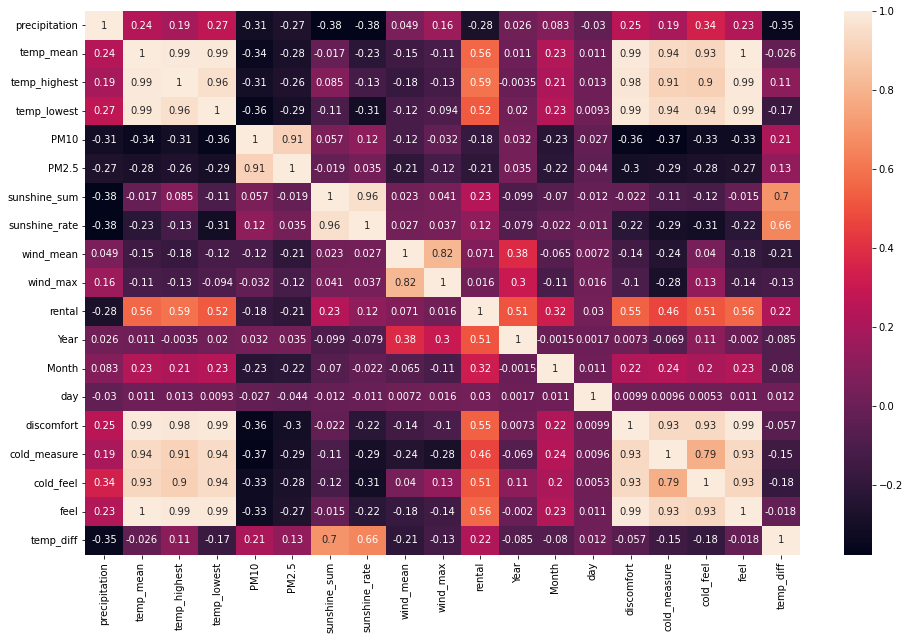

In [77]:
plt.figure(figsize = (16,10))
sns.heatmap(data_df.corr(),annot = True)
plt.show()

In [78]:
def get_result(pred):
    sub_df['rental'] = pred
    sub_df.to_csv('result.csv', index = False, encoding = 'UTF-8')
def get_nmae(pred,y):
    nmae = np.mean(abs(pred-y)/y)
    return nmae

x = data_df.drop('rental', axis = 1)
y = data_df['rental']

In [79]:
#여기
from xgboost import XGBRegressor as model
#여기
model = XGBRegressor(max_depth = 4, n_estimators = 100)
model.fit(x,y)
pred = 1.2*model.predict(test_df)

In [80]:
pred = pred.astype(int)

In [81]:
#여기
sub_df['rental'] = pred
sub_df.to_csv('3.csv',index=False)